# 1.4.2 Image Thresholding

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


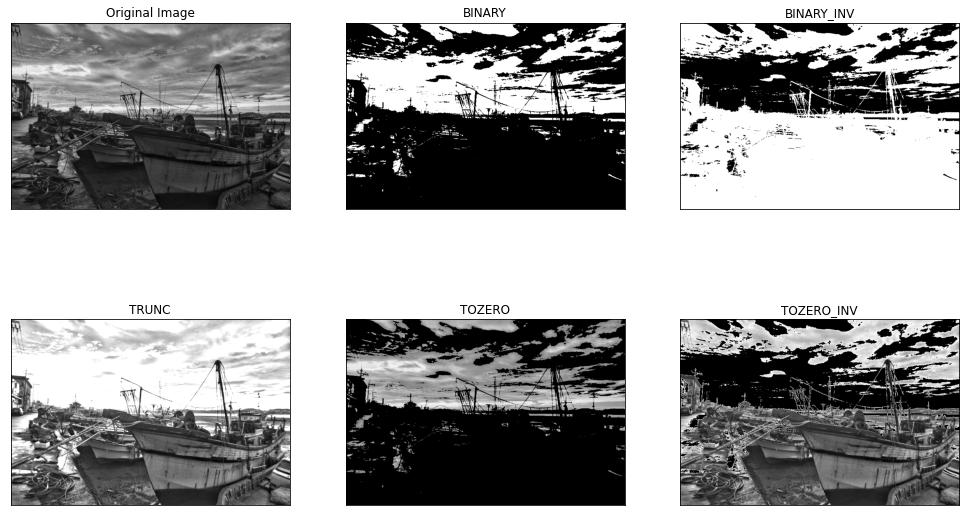

In [15]:
img = cv2.imread('test2.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [12]:
h,w=256,512
gray=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        gray[i,j]=(j)%256
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
        

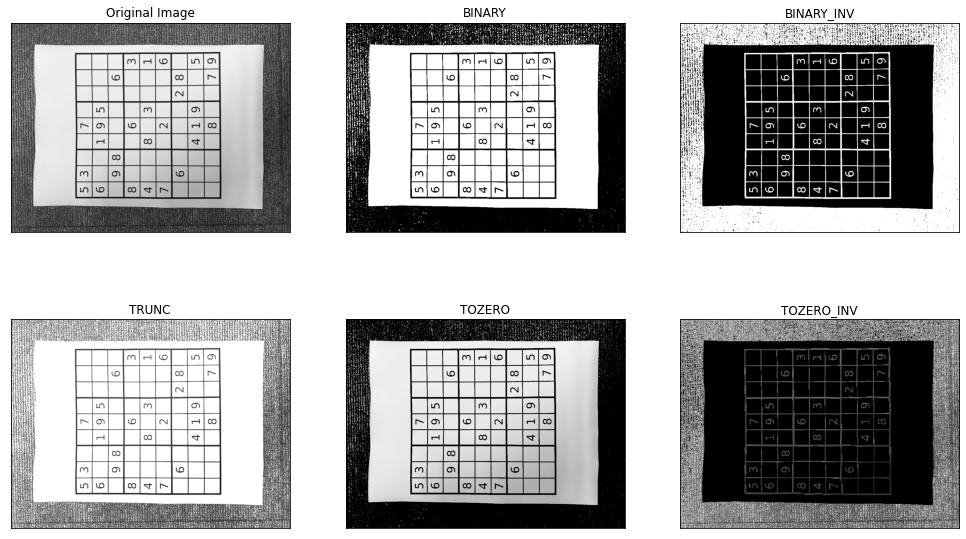

In [13]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

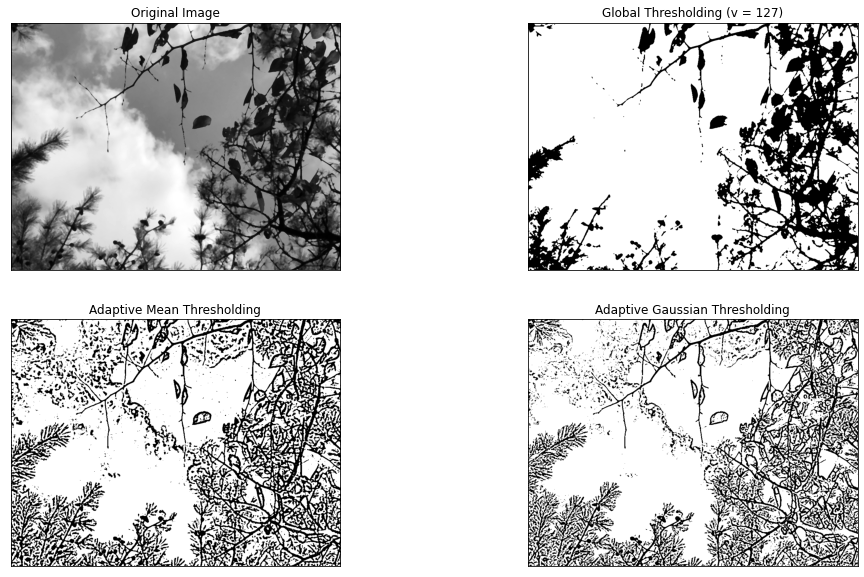

In [16]:
img = cv2.imread('sIMG_2180.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,64,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(17,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

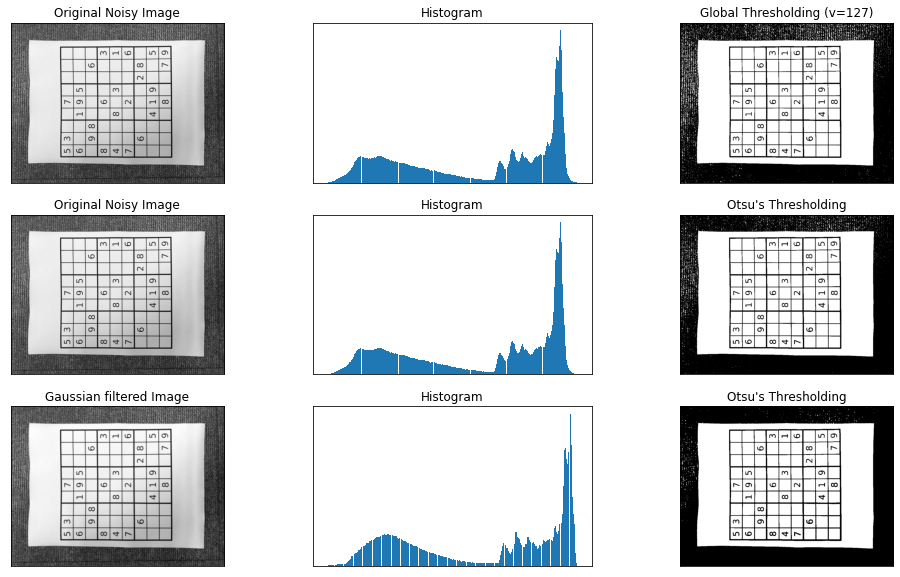

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sIMG_2164.jpg',0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(17,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


## Histogram

In [112]:
img = cv2.imread('sIMG_2164.jpg',0)

In [113]:
h,w=img.shape

In [114]:
hist=np.zeros(256,np.uint32)

In [115]:
for i in range(h):
    for j in range(w):
        hist[img[i,j]]+=1

In [116]:
hist

array([    0,     0,     0,     2,    12,    13,    35,    64,   100,
         153,   195,   282,   327,   443,   516,   623,   678,   770,
         840,   944,  1042,  1083,  1194,  1252,  1369,  1512,  1718,
        1919,  2031,  2301,  2538,  2834,  3261,  3486,  3696,  3974,
        4086,  4121,  4281,  4080,  4159,  3931,  3974,  3870,  3915,
        3847,  3879,  3856,  3890,  3947,  3998,  4073,  4021,  4128,
        4277,  4203,  4318,  4216,  4188,  4054,  4119,  3977,  3935,
        3789,  3809,  3744,  3672,  3505,  3628,  3414,  3400,  3306,
        3383,  3344,  3256,  3161,  3084,  3177,  3116,  3111,  3082,
        3010,  2920,  2914,  2869,  2859,  2851,  2689,  2674,  2637,
        2589,  2588,  2493,  2556,  2539,  2358,  2322,  2349,  2356,
        2324,  2302,  2268,  2217,  2187,  2121,  2127,  2021,  1880,
        2010,  1934,  1949,  1832,  1856,  1755,  1743,  1687,  1653,
        1586,  1617,  1527,  1454,  1437,  1437,  1436,  1424,  1348,
        1302,  1268,

In [86]:
hist[5]

13

In [119]:
img = cv2.imread('sIMG_2164.jpg',0)
h,w=img.shape

h,w,ch=256,512,3
hist_s=np.zeros((h,w,3),np.uint8)

for i in range(256):
    l = (int) ((hist[i]/10000)*255)
    histImage = cv2.rectangle(hist_s,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)

#for i in range(256):
  #  l=(int)(hist[i]/10000)*255
   # img = cv2.rectangle(hist_s,(2*i,h-0),(2*i+2,h-l),(0,255,0),1)
    
    


cv2.imshow('image',hist_s)
cv2.waitKey(0)
cv2.destroyAllWindows()

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

# with Noise

In [125]:
import random
h,w=256,512
img=np.zeros((h,w),np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256
        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [126]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)]=32
        
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [127]:
noiseImg=np.copy(img)

m=16
for i in range(h):
    for j in range(w):
        value=noiseImg[i,j]+random.randint(-m,m)
        if value< 0:
            noiseImg[i,j]=0
        elif value>255:
            noiseImg[i,j]=255
        else:
            noiseImg[i,j]=value
cv2.imshow('image',img)
cv2.imshow('image',noiseImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

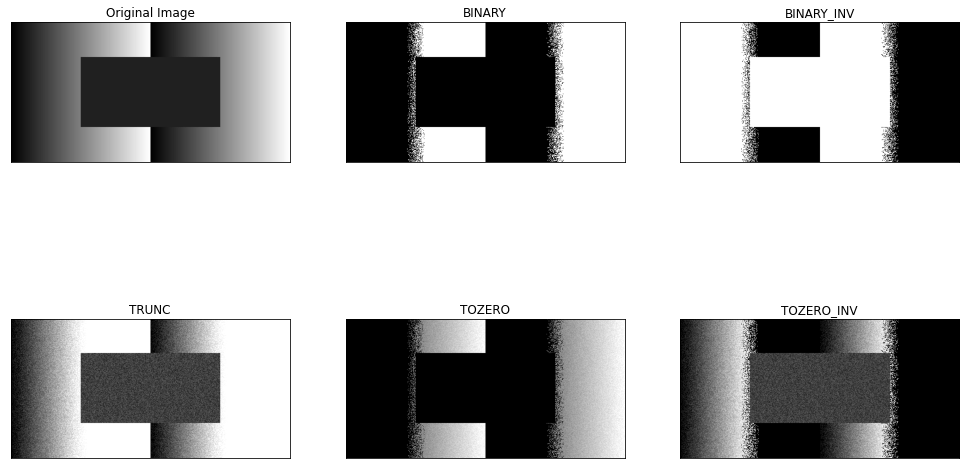

In [130]:
ret,thresh1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(17,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

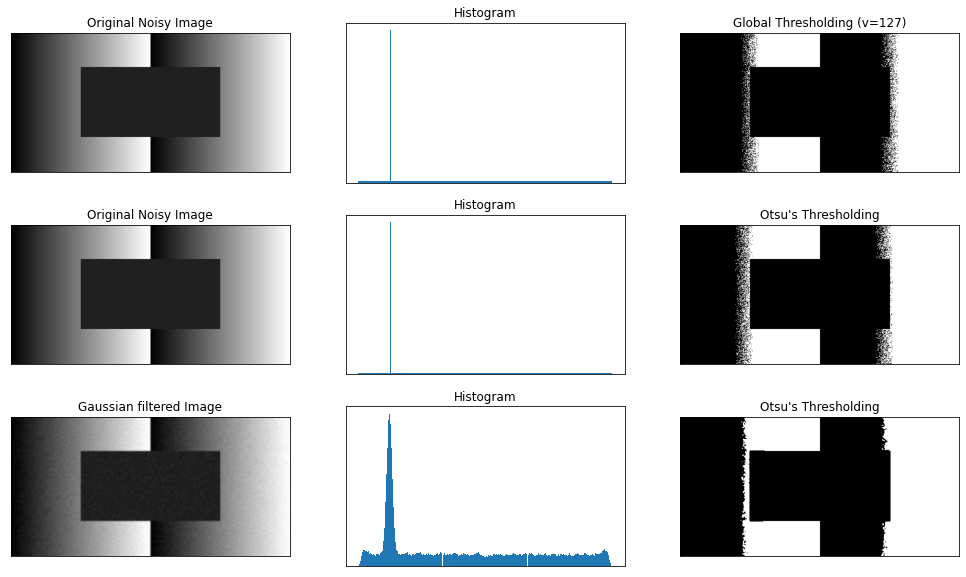

In [131]:
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(17,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
